# <b>End-to-End Machine Learning Workflow</b>

## <b>Predicting Housing Prices:</b> A Case Study of California Housing Dataset <i>(1990 California census)</i>

### <b>Objective</b>
To perform data preprocessing, cross-validation, hyperparameter tuning, pipeline construction, and model deployment.

## <b>Data Dictionary</b>
|   <b>Feature Name</b>    |   <b>Description</b>                                   |   <b>Data Type</b>   |
|--------------------------|--------------------------------------------------------|----------------------|
|   MedInc                 |    median income in block group                        |   float64            |
|   HouseAge               |    median house age in block group                     |   float64            |
|   AveRooms               |    average number of rooms per household               |   float64            |
|   AveBedrms              |    average number of bedrooms per household            |   float64            |
|   Population             |    block group population                              |   float64            |
|   AveOccup               |    average number of household members                 |   float64            |
|   Latitude               |    block group latitude                                |   float64            |
|   Longitude              |    block group longitude                               |   float64            |
|   MedHouseVal            |    median house value for households in the block      |  float64             |

<b>Note:</b> `MedHouseVal` is the `Target` Variable (in $100,000s).

## <b>Importing Libraries</b>

In [1]:
# import pickle 
import joblib
# import basic libraries
import pandas as pd 
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset
from sklearn.datasets import fetch_california_housing

# import machine learning libraries
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score, mean_squared_error 

# Supress warnings
import warnings 
warnings.filterwarnings('ignore')

## <b>Data Loading</b>

In [2]:
# Load dataset
housing_df = fetch_california_housing(as_frame=True).frame
# Make a copy of the dataset
df = housing_df.copy()

## <b>Exploratory Data Analysis</b>

In [3]:
# Check first 5 rowws
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Check the shape
df.shape

(20640, 9)

In [5]:
# Check for irregularities
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- No missing values in the dataset

In [6]:
# Check for duplicate values
df.duplicated().sum()

0

In [7]:
# Columns
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

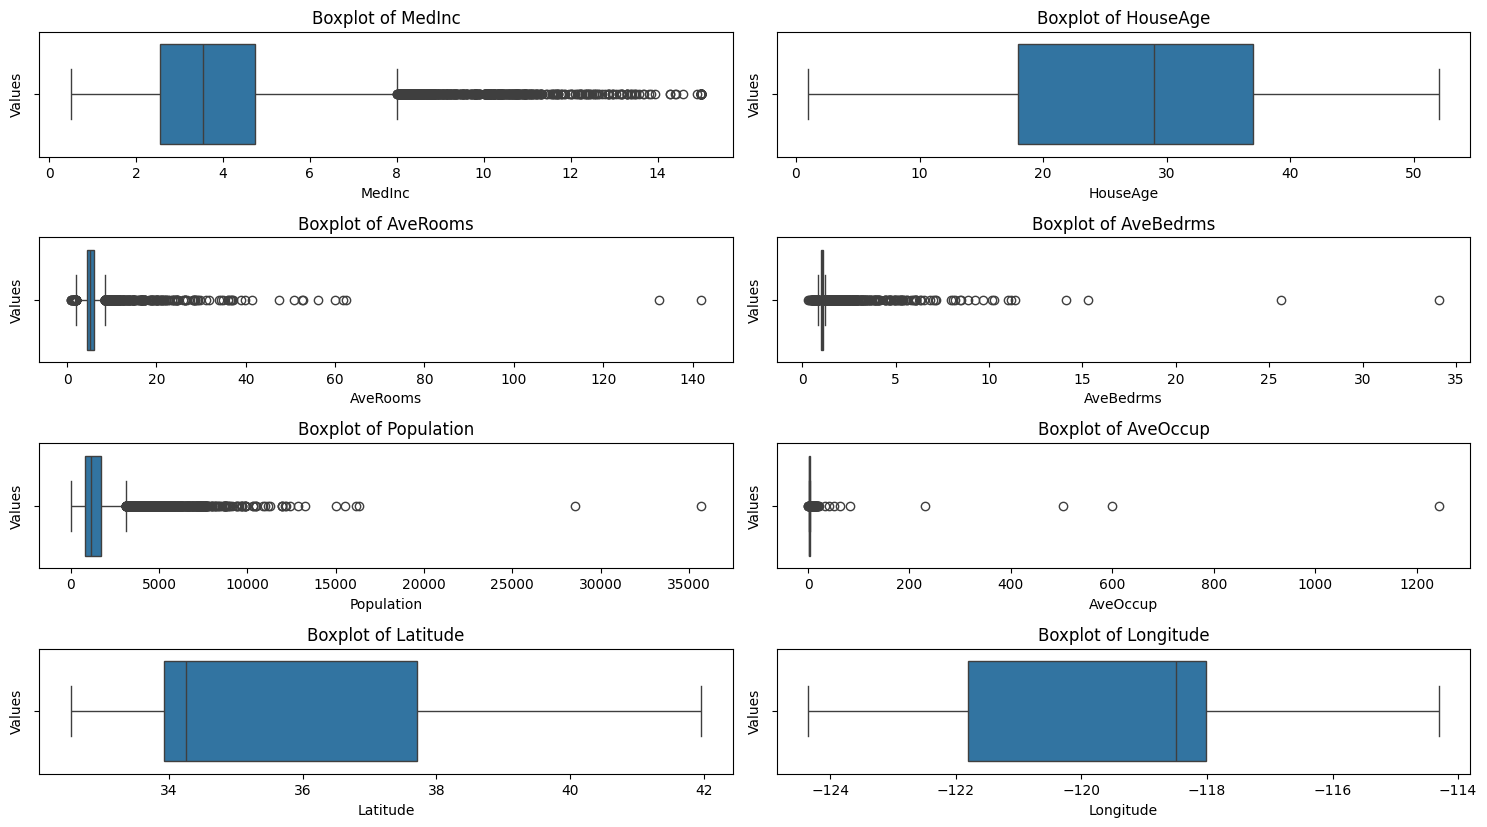

In [8]:
# Check for outliers 
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
ax = ax.flatten()
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=ax[i])
    ax[i].set_title(f"Boxplot of {column}")
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Values')
    
# Remove any unused subplots
for j in range(len(columns), len(ax)):
   fig.delaxes(ax[j])

plt.tight_layout()
plt.show();

- Presence of `outliers` in `MedInc`, `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` columns.

In [9]:
# Define feature and target variables
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <b>Data Preprocessing</b>

In [10]:
# Scaling numerical features
num_features = X.columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [11]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features)
    ]
)

In [12]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

In [13]:
# Define hyperparameters for grid search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2] # euclidean or manhattan distance
}

In [14]:
# Apply grid search with cross-validation
gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [15]:
# Fit the model
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object'))])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [16]:
# Evaluate the model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics outputs
print(f"Best Parameters: {gs.best_params_}")
print(f"Best CV R2 Score: {gs.best_score_:.4f}")
print(f"Test R2 Score: {r2:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
Best CV R2 Score: 0.7313
Test R2 Score: 0.7221
Test MSE: 0.3642
Test RMSE: 0.6034


In [17]:
# Save the model
with open("california_knn_pipeline.pkl", "wb") as file:
    joblib.dump(best_model, file)

In [18]:
# Load the model
# with open("california_knn_pipeline.pkl", "rb") as f:
#     loaded_model = joblib.load(f)

In [19]:
X_test.iloc[0:5, :]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


In [20]:
# !pip3 install streamlit joblib
# streamlit run California.py

In [21]:
# python -m streamlit run california.py